In [1]:
import pandas as pd
import numpy as np


from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.simplefilter("ignore")

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print(f"训练样本的数量为{train_df.shape[0]}")
print(f"测试样本的数量为{test_df.shape[0]}")

训练样本的数量为891
测试样本的数量为418


In [4]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
print(f"Age列中的缺失率为：{(train_df['Age'].isnull().sum()/train_df.shape[0]):.2%}")

Age列中的缺失率为：19.87%


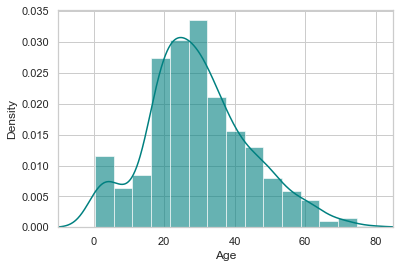

In [6]:
ax = train_df["Age"].hist(bins=15,density=True,color='teal',alpha=0.6)
ax.set(xlabel='Age')
train_df["Age"].plot(kind="density",color="teal")
plt.xlim(-10,85)
plt.show()

In [7]:
print(f"'Age'的平均数为{train_df['Age'].mean(skipna=True):.2f}")
print(f"'Age'的中位数为{train_df['Age'].median(skipna=True):.2f}")

'Age'的平均数为29.70
'Age'的中位数为28.00


S    644
C    168
Q     77
Name: Embarked, dtype: int64


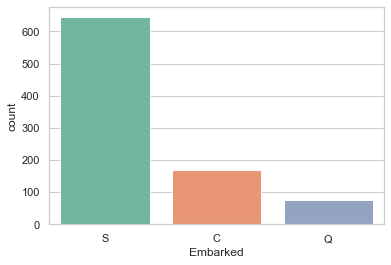

In [8]:
print(train_df["Embarked"].value_counts())
sns.countplot(x="Embarked",data=train_df,palette="Set2")
plt.show()

In [9]:
train_df["Embarked"].value_counts().idxmax()

'S'

In [10]:
train_data = train_df.copy()
train_data["Age"].fillna(train_data["Age"].median(skipna=True),inplace=True)
train_data["Embarked"].fillna(train_data["Embarked"].value_counts().idxmax(),inplace=True)
train_data.drop("Cabin",axis=1,inplace=True) # inplace=True表示在原dataframe上进行操作，不生成新的dataframe

In [11]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

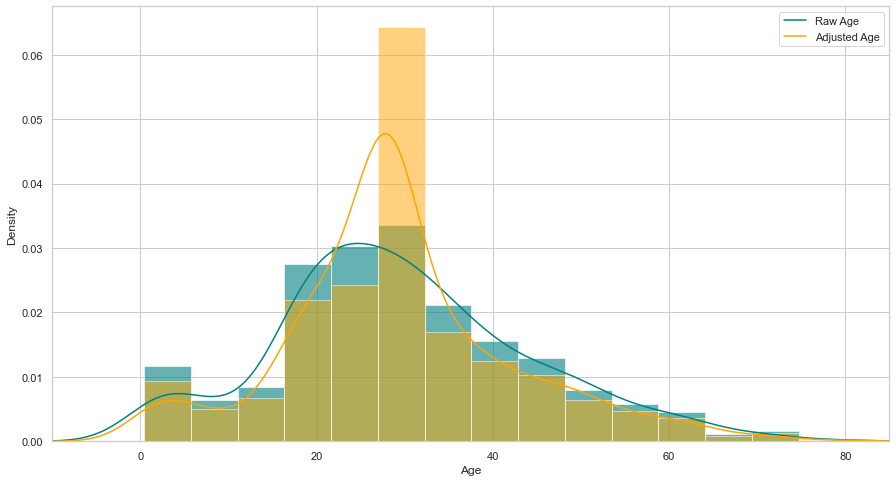

In [12]:
plt.figure(figsize=(15,8))
ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["Age"].plot(kind='density', color='teal')
ax = train_data["Age"].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.5)
train_data["Age"].plot(kind='density', color='orange')
ax.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [13]:
train_data["TravelAlone"] = np.where(train_data["SibSp"] + train_data["Parch"] == 0,1,0)
train_data.drop(["SibSp","Parch"],axis=1,inplace=True)

In [14]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,TravelAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,211536,13.0000,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,112053,30.0000,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,W./C. 6607,23.4500,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,111369,30.0000,C,1


In [15]:
training = pd.get_dummies(train_data,columns=["Pclass","Embarked","Sex"]) # 独热编码
training.drop(["Sex_female","PassengerId","Name","Ticket"],axis=1,inplace=True)
final_train = training
final_train.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1


In [16]:
test_data = test_df.copy()
test_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
test_data["Fare"].fillna(train_df["Fare"].median(skipna=True), inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

test_data['TravelAlone']=np.where((test_data["SibSp"]+test_data["Parch"])>0, 0, 1)

test_data.drop(["SibSp","Parch"],axis=1,inplace=True)

testing = pd.get_dummies(test_data, columns=["Pclass","Embarked","Sex"])
testing.drop(["Sex_female","PassengerId","Name","Ticket"],axis=1,inplace=True)

final_test = testing
final_test.head()

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,0,0,1,0,1,0,1
1,47.0,7.0000,0,0,0,1,0,0,1,0
2,62.0,9.6875,1,0,1,0,0,1,0,1
3,27.0,8.6625,1,0,0,1,0,0,1,1
4,22.0,12.2875,0,0,0,1,0,0,1,0


In [17]:
final_train['IsMinor']=np.where(final_train['Age']<=16, 1, 0)

final_test['IsMinor']=np.where(final_test['Age']<=16, 1, 0)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

cols = ["Age","Fare","TravelAlone","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"]
X = final_train[cols]
y = final_train["Survived"]

model = LogisticRegression()

rfe = RFE(model,8)
rfe = rfe.fit(X,y)

print(f"Selected features {list(X.columns[rfe.support_])}")

Selected features ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']


Optimal number of features: 9
[ True  True  True  True  True  True  True  True  True]
Selecting features: ['Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']


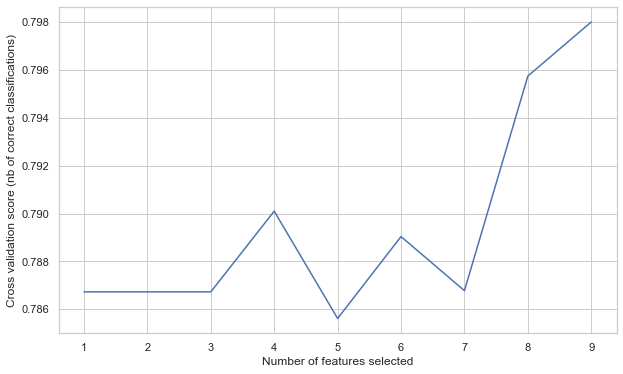

In [19]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=LogisticRegression(),step=1,cv=10,scoring='accuracy')
rfecv.fit(X,y)

print("Optimal number of features:",rfecv.n_features_)
print(rfecv.support_)
print("Selecting features:",list(X.columns[rfecv.support_]))

plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1,len(rfecv.grid_scores_)+1),rfecv.grid_scores_)
plt.show()

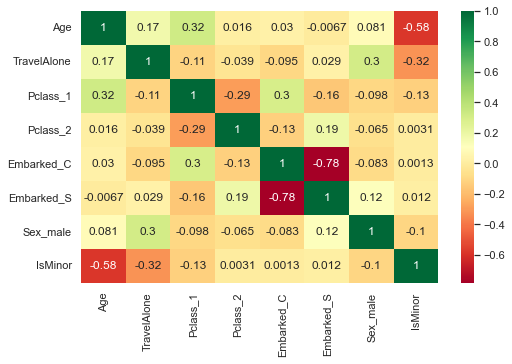

In [20]:
Selected_features = ["Age","TravelAlone","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"]
X = final_train[Selected_features]
plt.subplots(figsize=(8,5))
sns.heatmap(X.corr(),annot=True,cmap="RdYlGn")
plt.show()

In [33]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,roc_curve,auc,log_loss

X = final_train[Selected_features]
y = final_train["Survived"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:,1] # 第二列的概率

[fpr,tpr,thr] = roc_curve(y_test,y_pred_proba)
print(f"准确率为{accuracy_score(y_test,y_pred)}")
print(f"损失率为{log_loss(y_test,y_pred_proba)}")
print(f"auc为{auc(fpr,tpr)}")

idx = np.min(np.where(tpr > 0.95))

plt.figure()
plt.plot(fpr,tpr,color="coral",label="ROC curve")
plt.plot([0,1],[0,1],"k--")



准确率为0.7821229050279329
损失率为0.5042687392095501
auc为0.8379113924050632


In [35]:
final_test["Survived"] = logreg.predict(final_test[Selected_features])
final_test["PassengerId"] = test_df["PassengerId"]
submission = final_test[["PassengerId","Survived"]]
submission.to_csv("submission.csv",index=False)


'1'